In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy

import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import geopandas
import cartopy.io.shapereader as shpreader
import shapely

from matplotlib.patches import Rectangle, Patch

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
})


shp_ndf_df.head()

,shpfile_name,shpfile_id,ndf_id
0,adm0shps,0.0,4114.0
1,adm0shps,0.0,3971.0
2,adm0shps,0.0,4115.0
3,adm0shps,0.0,3972.0
4,adm0shps,0.0,4116.0


In [164]:
impact_preds = pd.read_csv('../data/1_impact_predictions.csv')
df_studies = pd.read_csv('../data/study_da.csv').merge(impact_preds)
df_studies.head()

places = pd.read_csv('../data/place_df.csv').merge(df_studies,left_on="doc_id",right_on="id")
places.head()

,word,spans,country_predicted,country_conf,doc_id,admin1,lat,lon,country_code3,geonameid,...,"12 - Mountains, snow and ice - lower_pred","12 - Mountains, snow and ice - upper_pred","12 - Rivers, lakes, and soil moisture - mean_prediction","12 - Rivers, lakes, and soil moisture - std_prediction","12 - Rivers, lakes, and soil moisture - lower_pred","12 - Rivers, lakes, and soil moisture - upper_pred",12 - Terrestrial ES - mean_prediction,12 - Terrestrial ES - std_prediction,12 - Terrestrial ES - lower_pred,12 - Terrestrial ES - upper_pred
0,China,"[{'start': 157, 'end': 162}]",CHN,0.687582,3314070,Hubei,30.52047,114.39637,CHN,6620465.0,...,0.091011,0.295305,0.611245,0.097047,0.514198,0.708292,0.041527,0.011560,0.029967,0.053087
1,Spain,"[{'start': 69, 'end': 74}]",ESP,0.946054,1306240,NaN,40.00000,-4.00000,ESP,2510769.0,...,0.082326,0.109944,0.170722,0.017116,0.153605,0.187838,0.822039,0.048131,0.773908,0.870169
2,Pyrenees,"[{'start': 996, 'end': 1004}]",FRA,0.787315,1306240,Languedoc-Roussillon-Midi-Pyrénées,44.02722,1.63559,FRA,11071623.0,...,0.082326,0.109944,0.170722,0.017116,0.153605,0.187838,0.822039,0.048131,0.773908,0.870169
3,Oklahoma,"[{'start': 471, 'end': 479}]",USA,0.959263,1425344,Oklahoma,35.49209,-97.50328,USA,4544379.0,...,0.088046,0.105300,0.124883,0.016409,0.108474,0.141292,0.823103,0.035313,0.787790,0.858416
4,Kansas,"[{'start': 484, 'end': 490}]",USA,0.959263,1425344,Kansas,38.50029,-98.50063,USA,4273857.0,...,0.088046,0.105300,0.124883,0.016409,0.108474,0.141292,0.823103,0.035313,0.787790,0.858416


In [132]:
shpfilename = shpreader.natural_earth(resolution='50m',
                      category='cultural',
                      name='admin_0_countries')

adm0shps = geopandas.read_file(shpfilename)
adm0shps.query('ADMIN=="Sudan"')

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
52,Admin-0 country,1,3,Sudan,SDN,0,2,Sovereign country,Sudan,SDN,...,ìë¨,Soedan,Sudan,SudÃ£o,Ð¡ÑÐ´Ð°Ð½,Sudan,Sudan,Sudan,èä¸¹å ±åå½,"POLYGON ((34.07812 9.46152, 34.07676 9.46152, ..."


(19, 43)

White Nile - 7 studies
South Darfur - 5 studies
Republic of the Sudan - 4 studies
North Kordofan - 4 studies
Khartoum - 3 studies


(0.0, 7.35, -0.5, 4.5)

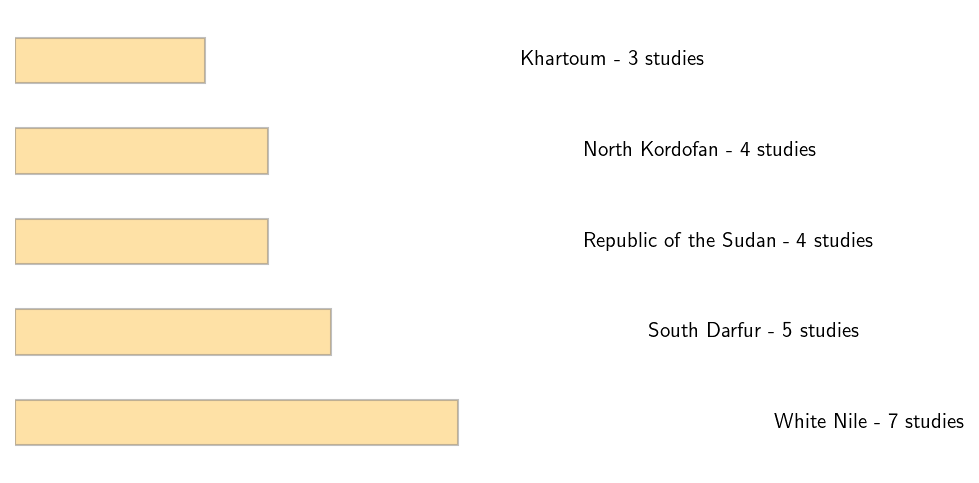

In [165]:
shp_ndf_df = pd.read_csv('../data/country_ndf_correspondence.csv')
df_ndf = pd.read_csv(f'../data/study_gridcell_2.5.csv')

country = "SDN"
country_index = adm0shps[adm0shps['SOV_A3']==country].index[0]
ndf_ids = shp_ndf_df.loc[shp_ndf_df["shpfile_id"]==country_index, "ndf_id"]

doc_ids = df_ndf.loc[df_ndf["ndf_id"].isin(ndf_ids),"doc_id"]

places = places.loc[~(places['word']=="Sudan") & (places['gridcells']!=len(ndf_ids))]

splaces = places[(places["doc_id"].isin(doc_ids)) & (places["country_predicted"]==country)].groupby('place_name').size().sort_values(ascending=False).head()

places[places['word']=="Sudan"]

fig, ax = plt.subplots(dpi=150, figsize=(4,4))

splaces.plot.barh(color="#fec44f", alpha=0.5, edgecolor="grey", ax=ax)

for i, c in enumerate(splaces):
    print(f"{splaces.index[i]} - {c} studies")
    ax.text(c+5, i, f"{splaces.index[i]} - {c} studies", va="center")
    
#ax.set_xlim(0,c+1)
plt.axis('off')

In [166]:
df = pd.read_csv('../data/2_merged_da_data.csv')

da_var = "updated_temp"
study_var = "temp_study_prop"
var = "Temperature"

df.loc[ndf_ids,"Country"]=df.loc[ndf_ids,study_var]
df.loc[ndf_ids,"cmask"]=np.nan

df["na"] = np.where(pd.isna(df[da_var]),1,np.nan)

df.head()

,LAT,LON,LAT_25,LON_25,LAT_5,LON_5,knutson_precip,updated_precip,knutson_temp,updated_temp,diff_temp,diff_precip,index,all_study_prop,precip_study_prop,temp_study_prop,Country,cmask,na
0,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,NaN,NaN,1.0
1,-88.75,-176.25,-88.75,-176.25,-87.5,-177.5,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,NaN,NaN,1.0
2,-88.75,-173.75,-88.75,-173.75,-87.5,-172.5,NaN,NaN,NaN,NaN,NaN,NaN,2,0.0,0.0,0.0,NaN,NaN,1.0
3,-88.75,-171.25,-88.75,-171.25,-87.5,-172.5,NaN,NaN,NaN,NaN,NaN,NaN,3,0.0,0.0,0.0,NaN,NaN,1.0
4,-88.75,-168.75,-88.75,-168.75,-87.5,-167.5,NaN,NaN,NaN,NaN,NaN,NaN,4,0.0,0.0,0.0,NaN,NaN,1.0


In [167]:
cdf = df.loc[ndf_ids]

cdf.groupby(da_var, dropna=False).size()

updated_temp
2.0     4
3.0    14
NaN     9
dtype: int64

<ipython-input-170-eefec84fd7db>:159: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig('../figures/si_figure_9.pdf')


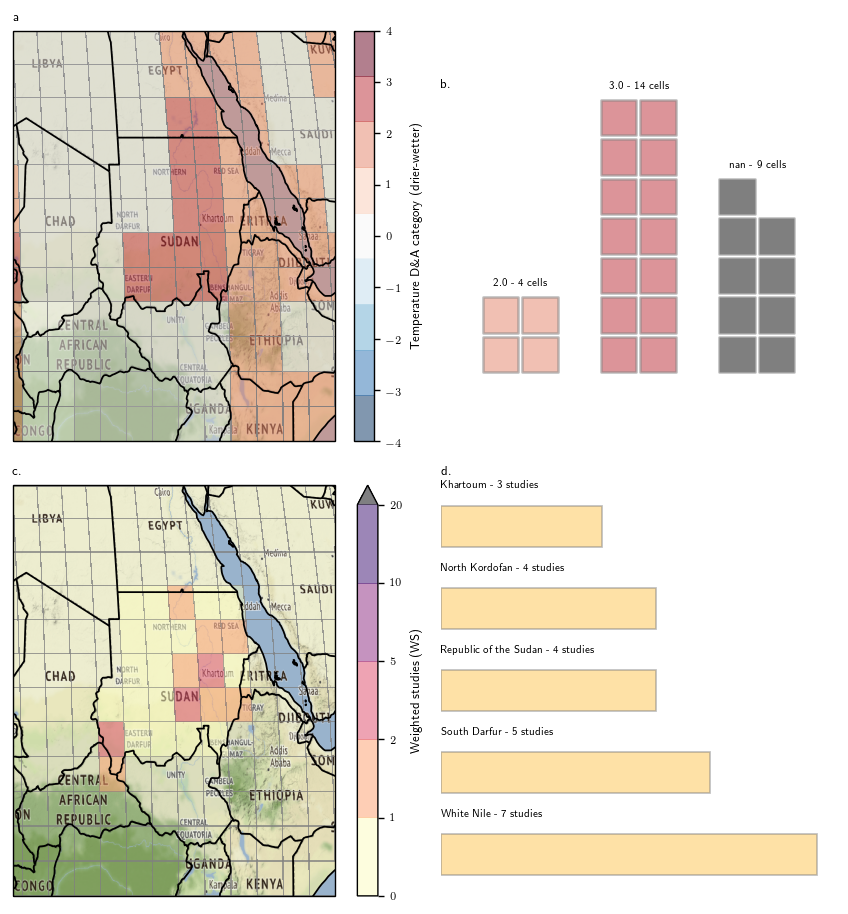

In [170]:
import cartopy.io.img_tiles as cimgt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

degrees = 2.5
degrees = 0

stamen_terrain = cimgt.Stamen('terrain')

fig = plt.figure(dpi=125, figsize=(7.2,7.2), constrained_layout=True)
gs = fig.add_gridspec(2, 2, figure=fig)

ax = plt.subplot(gs[0,0], projection=ccrs.EqualEarth())
ax.set_title("a", loc="left", fontweight="bold", fontsize=7)

ax.coastlines(lw=1)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, lw=1)

extent = [15,45,0,30]# Sudan
#ax.set_extent([48,87,40,55]) # Kazakhstan
#ax.set_extent([60,80,20,40]) # Pakistan

ax.set_extent(extent) 



ax.add_image(stamen_terrain, 5)



n = np.array(df[da_var]).reshape(len(df.LAT.unique()),len(df.LON.unique()))

bn = np.array(df.cmask).reshape(len(df.LAT.unique()),len(df.LON.unique()))

cn = np.array(df.na).reshape(len(df.LAT.unique()),len(df.LON.unique()))

mesh = ax.pcolormesh(
    df.LON.unique()-degrees*0.5,
    df.LAT.unique()-degrees*0.5,
    n,
    cmap=plt.cm.get_cmap('RdBu_r',9), vmin=-4, vmax=4,
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    lw=0.1,
    alpha=0.5
)

cmap = mesh.get_cmap()

mmesh = ax.pcolormesh(
    df.LON.unique()-degrees*0.5,
    df.LAT.unique()-degrees*0.5,
    cn,
    cmap = mpl.colors.ListedColormap(["lightgrey"]),
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    lw=0.1,
    alpha=0.5
)

cbar = plt.colorbar(mesh)
cbar.set_label(f'{var} D\&A category (drier-wetter)', fontsize=7)
cbar.ax.tick_params(labelsize=6)

#########################################

ax = plt.subplot(gs[0,1])
i = 0

for name, group in cdf.groupby(da_var, dropna=False):
    rects = []
    for j in range(group.shape[0]):
        x = i*3+1+j%2
        y = j//2
        rect = Rectangle((x+0.05,y+0.05), 0.9,0.9)
        rects.append(rect)
        
    pc = PatchCollection(rects, facecolor=cmap(mesh.norm(name)), alpha=0.5,
                         edgecolor="grey", lw=1.5)

    # Add collection to axes
    ax.add_collection(pc)
    
    ax.text(i*3+2,y+1.2,f"{name} - {j+1} cells", ha="center",va="bottom", fontsize=6)
    
    i+=1
    
plt.axis('scaled')
plt.axis('off')

    
#ax.set_ylim(0, i*3+1)
ax.set_ylim(0,7)
ax.set_xlim(0, i*3+1)

ax.set_title("b.", loc="left", fontweight="bold", fontsize=7)


###################################################
######

n = np.array(df.Country).reshape(len(df.LAT.unique()),len(df.LON.unique()))

vm = np.nanmax(n)

cn = np.array(df.na).reshape(len(df.LAT.unique()),len(df.LON.unique()))

bn = np.array(df.cmask).reshape(len(df.LAT.unique()),len(df.LON.unique()))

ax = plt.subplot(gs[1,0], projection=ccrs.EqualEarth())
ax.set_title("c.", loc="left", fontweight="bold", fontsize=7)

ax.coastlines(lw=1)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, lw=1)
#ax.set_extent([0,30,50,80])

ax.set_extent(extent)

ax.add_image(stamen_terrain, 5)

bounds = np.array([0,1,2,5,10,20,50,100,200])
bounds = np.array([0,1,2,5,10,20])
cmap_mgm = plt.cm.get_cmap('magma_r',len(bounds))
colors = list(cmap_mgm(np.arange(len(bounds))))
cmap = mpl.colors.ListedColormap(colors[:-1], "")
cmap.set_over(colors[-1])

mesh = ax.pcolormesh(
    df.LON.unique()-degrees*0.5,
    df.LAT.unique()-degrees*0.5,
    n,
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    norm = mpl.colors.BoundaryNorm(bounds,ncolors=len(bounds)-1,clip=False),
    cmap=cmap, 
    lw=0.1,
    alpha=0.5
)

cbar = plt.colorbar(mesh, extend="max")
cbar.set_label('Weighted studies (WS)', fontsize=7)
cbar.ax.tick_params(labelsize=6)

###########################

ax = plt.subplot(gs[1,1])
ax.set_title("d.", loc="left", fontweight="bold", fontsize=7)

splaces.plot.barh(color="#fec44f", alpha=0.5, edgecolor="grey", ax=ax)

for i, c in enumerate(splaces):
    ax.text(0, i+0.5, f"{splaces.index[i]} - {c} studies", va="center", fontsize=6)
    
#ax.set_xlim(0,c+1)
ax.axis('off')

plt.savefig('../figures/si_figure_9.pdf')
plt.savefig('../figures/si_figure_9.png', dpi=150)

In [153]:
88/27

3.259259259259259

NameError: name 'ndf' is not defined

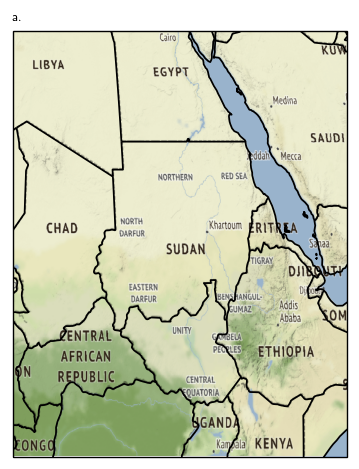

In [56]:
fig = plt.figure(dpi=125, figsize=(7.2,7.2), constrained_layout=True)
gs = fig.add_gridspec(2, 2, figure=fig)

ax = plt.subplot(gs[0,0], projection=ccrs.EqualEarth())
ax.set_title("a.", loc="left", fontweight="bold", fontsize=7)

ax.coastlines(lw=1)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, lw=1)

ax.set_extent([15,45,0,30])

ax.add_image(stamen_terrain, 5)

ndf["Country"] = np.nan
ndf["na"] = np.where(pd.isna(ndf["da_cat"]),1,np.nan)
ndf_ids = shp_ndf_df.loc[shp_ndf_df["shpfile_id"]==52, "ndf_id"]
ndf.loc[ndf_ids,"Country"]=ndf.loc[ndf_ids,"da_cat"]
ndf.loc[ndf_ids,"cmask"]=np.nan
n = np.array(ndf.da_cat).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

cn = np.array(ndf.na).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

bn = np.array(ndf.cmask).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

mesh = ax.pcolormesh(
    ndf.LON.unique()-degrees*0.5,
    ndf.LAT.unique()-degrees*0.5,
    n,
    cmap=plt.cm.get_cmap('RdBu_r',7), vmin=-3, vmax=3,
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    lw=0.1,
    alpha=0.5
)

mmesh = ax.pcolormesh(
    ndf.LON.unique()-degrees*0.5,
    ndf.LAT.unique()-degrees*0.5,
    cn,
    cmap = mpl.colors.ListedColormap(["lightgrey"]),
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    lw=0.1,
    alpha=0.5
)

cbar = plt.colorbar(mesh)
cbar.set_label('Precipitation D&A category (drier-wetter)', fontsize=7)
cbar.ax.tick_params(labelsize=6)


ax = plt.subplot(gs[0,1])
i = 0

for name, group in cdf.groupby('da_cat', dropna=False):
    rects = []
    for j in range(group.shape[0]):
        x = i*3+1+j%2
        y = j//2
        rect = Rectangle((x+0.05,y+0.05), 0.9,0.9)
        rects.append(rect)
        
    pc = PatchCollection(rects, facecolor=colors[i], alpha=0.5,
                         edgecolor="grey", lw=1.5)

    # Add collection to axes
    ax.add_collection(pc)
    
    ax.text(i*3+2,y+1.2,f"{name} - {j+1} cells", ha="center",va="bottom", fontsize=6)
    
    i+=1
    
plt.axis('scaled')
plt.axis('off')

    
#ax.set_ylim(0, i*3+1)
ax.set_ylim(0,7)
ax.set_xlim(0, i*3+1)

ax.set_title("b.", loc="left", fontweight="bold", fontsize=7)


###############################################################
####################


ndf["Country"] = np.nan
ndf["na"] = np.where(pd.isna(ndf["da_cat"]),1,np.nan)
ndf_ids = shp_ndf_df.loc[shp_ndf_df["shpfile_id"]==52, "ndf_id"]
ndf.loc[ndf_ids,"Country"]=ndf.loc[ndf_ids,"n_study_prop"]
ndf.loc[ndf_ids,"cmask"]=np.nan
n = np.array(ndf.Country).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

vm = np.nanmax(n)

cn = np.array(ndf.na).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

bn = np.array(ndf.cmask).reshape(len(ndf.LAT.unique()),len(ndf.LON.unique()))

ax = plt.subplot(gs[1,0], projection=ccrs.EqualEarth())
ax.set_title("c.", loc="left", fontweight="bold", fontsize=7)

ax.coastlines(lw=1)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, lw=1)
#ax.set_extent([0,30,50,80])

ax.set_extent([15,45,0,30])

ax.add_image(stamen_terrain, 5)

mesh = ax.pcolormesh(
    ndf.LON.unique()-degrees*0.5,
    ndf.LAT.unique()-degrees*0.5,
    n,
    transform=ccrs.PlateCarree(),
    edgecolor="grey",
    norm = mpl.colors.LogNorm(vmin=0.1, vmax=10),
    cmap=plt.cm.get_cmap('YlOrBr',5), 
    lw=0.1,
    alpha=0.5
)

cbar = plt.colorbar(mesh)
cbar.set_label('Weighted studies (WS)', fontsize=7)
cbar.ax.tick_params(labelsize=6)

###########################

ax = plt.subplot(gs[1,1])
ax.set_title("d.", loc="left", fontweight="bold", fontsize=7)

splaces.plot.barh(color="#fec44f", alpha=0.5, edgecolor="grey", ax=ax)

for i, c in enumerate(splaces):
    ax.text(0, i+0.5, f"{splaces.index[i]} - {c} studies", va="center", fontsize=6)
    
ax.set_xlim(0,c+1)
ax.axis('off')

plt.savefig('../figures/si_figure_5.pdf')
plt.savefig('../figures/si_figure_5.png', dpi=150)